# Economic Data Analysis (Fred API & Pandas)

We will be using Fred API and Pandas to pull, visualize, discover, and interpret economic data in this project

---

# Step 0: Importing the Necessary Packages, Styles, and API Key

First, we import the necessary packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred


Next, we select the specific aesthetic we want for our plot styles, plot palette, and dataframe visualization.

In [7]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500) # This will allow to see 500 columns instead of hiding the middle columns within the dataset by default
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

Finally, we input our specifc FRED API key that we will use for pulling the data from FRED

In [8]:
fred_key = 'c824a5a4b2eac6d90156a4faa6b0c8bc'

---

# Step 1: Create the FRED object

In [9]:
fred = Fred(api_key = fred_key)

---

# Step 2: Search FRED for Economic Data

First, we will search for S&P 500 data and sort it by FRED's respective popularity score

In [11]:
sp_search = fred.search('S&P', order_by='popularity')

Now, let's look at the shape of the data

In [12]:
sp_search.shape

(1000, 15)

Note that FRED only allows 1000 observations for its searched datasets. 

---

# Step 3: Pull the Raw Data

Now, let's pull the raw data from a dataset that obtained the daily data of the S&P 500

In [13]:
fred.get_series(series_id = 'SP500')

2014-10-27    1961.63
2014-10-28    1985.05
2014-10-29    1982.30
2014-10-30    1994.65
2014-10-31    2018.05
               ...   
2024-10-21    5853.98
2024-10-22    5851.20
2024-10-23    5797.42
2024-10-24    5809.86
2024-10-25    5808.12
Length: 2610, dtype: float64

In [14]:
sp500 = fred.get_series(series_id = 'SP500')

Now we have a pandas series of the daily S&P 500 data. <br>
The `index` is `DATETIME` columns. <br>
The `values` is the value of the S&P 500 (or the index level) for that specific `DATETIME`. <br>

Now, let's do some quick visualization.

<Axes: title={'center': 'S&P 500'}>

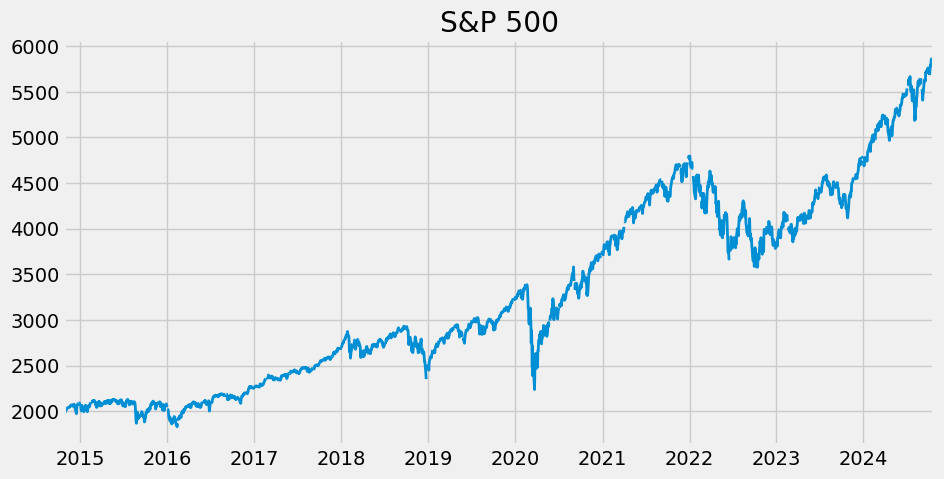

In [19]:
sp500.plot(figsize=(10,5), title = 'S&P 500', lw=2)

___

# Step 4: Pull and Join Multiple Data Series

We will now pull in some data from multiple data series and compare these data series to our S&P 500 data that we are currently working with.

First, we will pull some seasonally adjusted data from the FRED dataset that contains the monthly data of the Unemployment Rate `UNRATE` 

In [22]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
2024-08-01    4.2
2024-09-01    4.1
Length: 921, dtype: float64

Next, let's get a quick visualization of our 'unrate` data.

<Axes: >

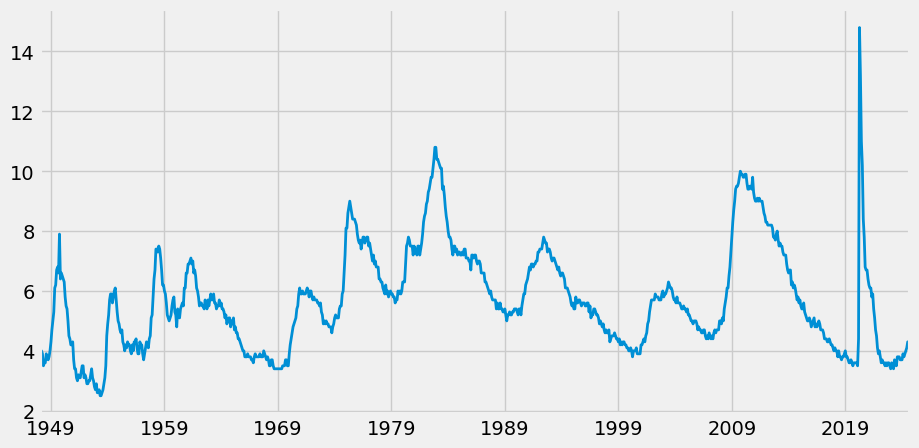

In [23]:
unrate.plot(figsize=(10,5), lw=2)

Now, let's get the specific unemployment rate for a handful of states and filter data that as monthly data only.

In [28]:
fred.search('unemployment state rate', filter=('frequency', 'Monthly'))

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-10-26   2024-10-26   
UNRATENSA      UNRATENSA     2024-10-26   2024-10-26   
LNS14000006  LNS14000006     2024-10-26   2024-10-26   
UNEMPLOY        UNEMPLOY     2024-10-26   2024-10-26   
LNU03000000  LNU03000000     2024-10-26   2024-10-26   
...                  ...            ...          ...   
INBART5URN    INBART5URN     2024-10-26   2024-10-26   
MOPRURN          MOPRURN     2024-10-26   2024-10-26   
PENS812UR      PENS812UR     2024-10-26   2024-10-26   
AKRO439UR      AKRO439UR     2024-10-26   2024-10-26   
PORT912UR      PORT912UR     2024-10-26   2024-10-26   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU03000000                                 Unemployment Level   
...                                                        ...   
INBART5URN         Unemployment Rate in Bartholomew County, IN   
MOPRURN                  Unemployment Rate in Perry County, MO   
PENS812UR    Unemployment Rate in Pensacola-Ferry Pass-Bren...   
AKRO439UR                 Unemployment Rate in Akron, OH (MSA)   
PORT912UR        Unemployment Rate in Port St. Lucie, FL (MSA)   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-09-01   Monthly               M   
UNRATENSA          1948-01-01      2024-09-01   Monthly               M   
LNS14000006        1972-01-01      2024-09-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-09-01   Monthly               M   
LNU03000000        1948-01-01      2024-09-01   Monthly               M   
...                       ...             ...       ...             ...   
INBART5URN         1990-01-01      2024-08-01   Monthly               M   
MOPRURN            1990-01-01      2024-08-01   Monthly               M   
PENS812UR          1990-01-01      2024-08-01   Monthly               M   
AKRO439UR          1990-01-01      2024-08-01   Monthly               M   
PORT912UR          1990-01-01      2024-08-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU03000000  Thousands of Persons  Thous. of Persons   
...                           ...                ...   
INBART5URN                Percent                  %   
MOPRURN                   Percent                  %   
PENS812UR                 Percent                  %   
AKRO439UR                 Percent                  %   
PORT912UR                 Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU03000000       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
INBART5URN        Not Seasonally Adjusted                       NSA   
MOPRURN           Not Seasonally Adjusted                       NSA   
PENS812UR    Smooth

Let's put this data into a dataframe

In [70]:
uemp_df = fred.search('unemployment state rate', filter=('frequency', 'Monthly'))

Now, let's filter this dataframe on the `title` column because it has more than just unemployement rate to create a subset of the data. <br>
<br>
First, we want to obtain only monthly data that has been seasonally adjusted and has the `units` column in the form of a percent

In [71]:
unemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-10-27   2024-10-27   
LNS14000006                LNS14000006     2024-10-27   2024-10-27   
U6RATE                          U6RATE     2024-10-27   2024-10-27   
CAUR                              CAUR     2024-10-27   2024-10-27   
TXUR                              TXUR     2024-10-27   2024-10-27   
...                                ...            ...          ...   
M08311USM156SNBR      M08311USM156SNBR     2024-10-27   2024-10-27   
LNS13008397                LNS13008397     2024-10-27   2024-10-27   
LBSSA20                        LBSSA20     2024-10-27   2024-10-27   
LNS14000150                LNS14000150     2024-10-27   2024-10-27   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-10-27   2024-10-27   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
TXUR                                       Unemployment Rate in Texas   
...                                                               ...   
M08311USM156SNBR    Unemployment Rate, Married Males, Spouse Prese...   
LNS13008397         Of Total Unemployed, Percent Unemployed Less T...   
LBSSA20                     Labor Force Participation Rate for Kansas   
LNS14000150                           Unemployment Rate - Married Men   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-09-01   Monthly   
LNS14000006               1972-01-01      2024-09-01   Monthly   
U6RATE                    1994-01-01      2024-09-01   Monthly   
CAUR                      1976-01-01      2024-09-01   Monthly   
TXUR                      1976-01-01      2024-09-01   Monthly   
...                              ...             ...       ...   
M08311USM156SNBR          1954-11-01      1968-01-01   Monthly   
LNS13008397               1948-01-01      2024-09-01   Monthly   
LBSSA20                   1976-01-01      2024-09-01   Monthly   
LNS14000150               1955-01-01      2024-09-01   Monthly   
NEIPTERM156SFRBRIC        1994-01-01      2024-09-01   Monthly   

                   frequency_short    units units_short  seasonal_adjustment  \
series id                                                                      
UNRATE                           M  Percent           %  Seasonally Adjusted   
LNS14000006                      M  Percent           %  Seasonally Adjusted   
U6RATE                           M  Percent           %  Seasonally Adjusted   
CAUR                             M  Percent           %  Seasonally Adjusted   
TXUR                             M  Percent           %  Seasonally Adjusted   
...                            ...      ...         ...                  ...   
M08311USM156SNBR                 M  Percent           %  Seasonally Adjusted   
LNS13008397                      M  Percent           %  Seasonally Adjusted   
LBSSA20                          M  Percent           %  Seasonally Adjusted   
LNS14000150                      M  Percent           %  Seasonally Adjusted   
NEIPTERM156SFRBRIC               M  Percent           %  Seasonally Adjusted   

                   seasonal_adjustment_short               last_updated  \
series id                                                                 
UNRATE                                    SA  2024-10-04 07:54:02-05:00   
LNS14000006                               SA  2024

Now, we will take this data, and once again filter, by only taking observations that contain the words "Unemployment Rate" in the `title` column. <br>
<br>
We will do this by applying a string filter.

In [72]:
unemp_df['title']

series id
UNRATE                                                Unemployment Rate
LNS14000006               Unemployment Rate - Black or African American
U6RATE                Total Unemployed, Plus All Persons Marginally ...
CAUR                                    Unemployment Rate in California
TXUR                                         Unemployment Rate in Texas
                                            ...                        
M08311USM156SNBR      Unemployment Rate, Married Males, Spouse Prese...
LNS13008397           Of Total Unemployed, Percent Unemployed Less T...
LBSSA20                       Labor Force Participation Rate for Kansas
LNS14000150                             Unemployment Rate - Married Men
NEIPTERM156SFRBRIC    Hornstein-Kudlyak-Lange Non-Employment Index i...
Name: title, Length: 158, dtype: object

Now we locate where that string filter is true

In [83]:
# Access the observation by index label
unemp_ur = unemp_df.loc['UNRATE']
unemp_ur

id                                                                      UNRATE
realtime_start                                             2024-10-27 00:00:00
realtime_end                                               2024-10-27 00:00:00
title                                                        Unemployment Rate
observation_start                                          1948-01-01 00:00:00
observation_end                                            2024-09-01 00:00:00
frequency                                                              Monthly
frequency_short                                                              M
units                                                                  Percent
units_short                                                                  %
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

In [85]:

unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

Now let's add the unemployment rate `UNRATE` back to the series

In [159]:
unemp_df = pd.concat([unemp_ur.to_frame().T, unemp_df], ignore_index=False)


Now that we have filtered the exact data that we want to work with, let's obtain all of these series from FRED and convert each series into a dataframe

In [89]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid) #Converting the data to a dataframe from a series
    all_results.append(results)
    

Now let's take all of these results (which are currently stored in a list) and combine them with `pd.concat` and remove the columns that are not states

Let's also remove some columns that are not states and/or the UNRATE

In [160]:
unemp_results = pd.concat(all_results, axis=1).drop(['LASMT261982000000003', 'LASMT391746000000003', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'], axis=1)


Now, let's just look at the data for Unemployment in the states of the United States

In [314]:
unemp_states = unemp_results.drop('UNRATE', axis = 1)

Now, let's see if we have missing data, how much is missing, see if we can drop the data, and remove those observations if it is an option

<Axes: >

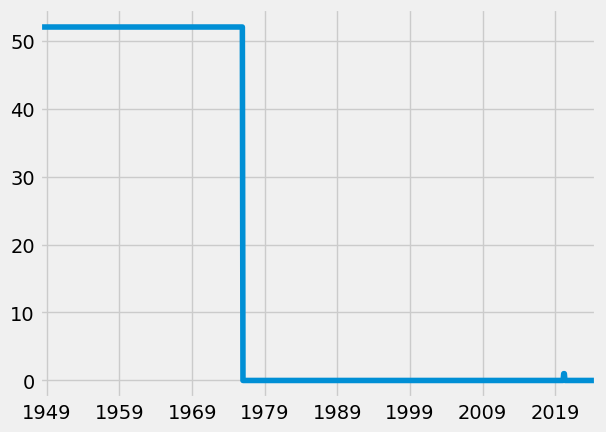

In [315]:
unemp_states.isna().sum(axis=1).plot()

As we can see by the plot, the missing data is able to get removed without altering our dataset and our overall goal.

In [316]:
unemp_states = unemp_states.dropna()
unemp_states

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-05-01   5.2   4.0   4.2   3.3   3.4   4.2   3.9   3.0   3.0   3.6   4.9   
2024-06-01   5.2   4.0   4.2   3.3   3.4   4.4   4.1   2.9   3.2   3.6   5.0   
2024-07-01   5.2   4.1   4.3   3.3   3.4   4.5   4.4   2.8   3.5   3.7   5.2   
2024-08-01   5.3   4.1   4.4   3.3   3.4   4.5   4.5   2.8   3.7   3.8   5.3   
2024-09-01   5.3   4.1   4.4   3.3   3.4   4.5   4.5   2.9   3.8   3.8   5.3   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-05-01   4.6   3.2   3.8   3.4   2.9   2.7   4.6   3.4   3.8   2.8   3.0   
2024-06-01   4.6   3.3   3.8   3.3   2.9   2.7   4.6   3.6   3.9   2.9   3.0   
2024-07-01   4.7   3.4   3.9   3.4   3.0   2.7   4.7   3.9   4.0   3.2   3.0   
2024-08-01   4.8   3.6   4.0   3.4   2.9   2.8   4.8   4.3   4.1   3.3   3.1   
2024-09-01   4.7   3.6   4.0   3.5   2.9   2.9   4.9   4.5   4.2   3.4   3.2   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-05-01   4.9   2.7   4.2   4.2   5.1   3.4   3.5   3.5   4.5   2.8   2.9   
2024-06-01   4.8   2.8   4.1   4.1   5.2   3.3   3.4   3.7   4.5   2.8   3.0   
2024-07-01   4.9   2.8   4.1   4.2   5.4   3.3   3.5   3.8   4.5   2.8   3.2   
2024-08-01   4.8   2.9   4.0   4.2   5.5   3.3   3.4   3.9   4.6   2.9   3.3   
2024-09-01   4.8   2.9   4.0   4.2   5.6   3.3   3.4   3.9   4.6   2.9   3.5   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1976-01-01  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-02-01  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-03-01  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   3.3   9.8   
1976-04-01  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   3.2   9.6   
1976-05-01  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   3.1   9.4   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-05-01   5.8   3.7   4.1   3.0   2.0   3.1   5.3   2.8   3.0   2.5   4.3   
2024-06-01   5.8   3.8   4.0   2.9   2.1   3.1   5.4   2.8   2.8   2.6   3.9   
2024-07-01   5.8   4.0   3.9   2.9   2.2   3.1   5.5   2.7   2.8   2.6   3.6   
2024-08-01   5.7   4.2   3.9   2.9   2.3   3.2   5.7   2.7   2.8   2.7   3.4   
2024-09-01   5.5   4.3   3.9   2.9   2.3   3.3   5.7   2.8   2.8   2.7   3.2   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1976-01-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-02-01   5.6   6.5   7.8   4.2   4.1   8.0

Now, let's look at some visualizations of the unemployment rates of each state

In [280]:

px.line(unemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CAUR',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 7, 1, 0, 0),
                          datetime.datetime(2024, 8, 1, 0, 0),
                          datetime.datetime(2024, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 5.2, 5.3, 5.3]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=TXUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'TXUR',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'TXUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 7, 1, 0, 0),
                          datetime.datetime(2024, 8, 1, 0, 0),
                          datetime.datetime(2024, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 4.1, 4.1, 4.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=NYUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'NYUR',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'NYUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 7, 1, 0, 0),
                          datetime.datetime(2024, 8, 1, 0, 0),
                          datetime.datetime(2024, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.3,  4.4,  4.4]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FLUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FLUR',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FLUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 7, 1, 0, 0),
                          datetime.datetime(2024, 8, 1, 0, 0),
                          datetime.datetime(2024, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 3.3, 3.3, 3.3]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=PAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'PAUR',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'PAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                     

___

## May 2020 Unemployment Rate Per State

Obviously, there was a large spike in May 2020 for each state's unemployment rate.
Let's clean, organize, rename, and visualize this data.

The identifiers that FRED users for each state is a little messy. Let's grab each state name from the dataset, create a dictionary of these names, and rename each column that represents a state's unemployment rate to their full state name

First, we grab the state names and create a dictionary of these names

In [317]:
id_for_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

Next, we use mapping to rename the columns with each state's official name

In [318]:
unemp_states.columns = [id_for_state[c] for c in unemp_states.columns]

In [283]:
unemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   
2024-07-01         5.2    4.1       4.3      3.3           3.4   4.5   
2024-08-01         5.3    4.1       4.4      3.3           3.4   4.5   
2024-09-01         5.3    4.1       4.4      3.3           3.4   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-05-01       3.9      3.0            3.0             3.6       4.9   
2024-06-01       4.1      2.9            3.2             3.6       5.0   
2024-07-01       4.4      2.8            3.5             3.7       5.2   
2024-08-01       4.5      2.8            3.7             3.8       5.3   
2024-09-01       4.5      2.9            3.8             3.8       5.3   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2024-05-01         4.6      3.2       3.8      3.4        2.9       2.7   
2024-06-01         4.6      3.3       3.8      3.3        2.9       2.7   
2024-07-01         4.7      3.4       3.9      3.4        3.0       2.7   
2024-08-01         4.8      3.6       4.0      3.4        2.9       2.8   
2024-09-01         4.7      3.6       4.0      3.5        2.9       2.9   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2024-05-01       4.6             3.4         3.8        2.8        3.0   
2024-06-01       4.6             3.6         3.9        2.9        3.0   
2024-07-01       4.7             3.9         4.0        3.2        3.0   
2024-08-01       4.8             4.3         4.1        3.3        3.1   
2024-09-01       4.9             4.5         4.2        3.4        3.2   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

Finally, let's plot this data from May 2020 now that we have renamed and organized our data obtaining each state's unemployment rate

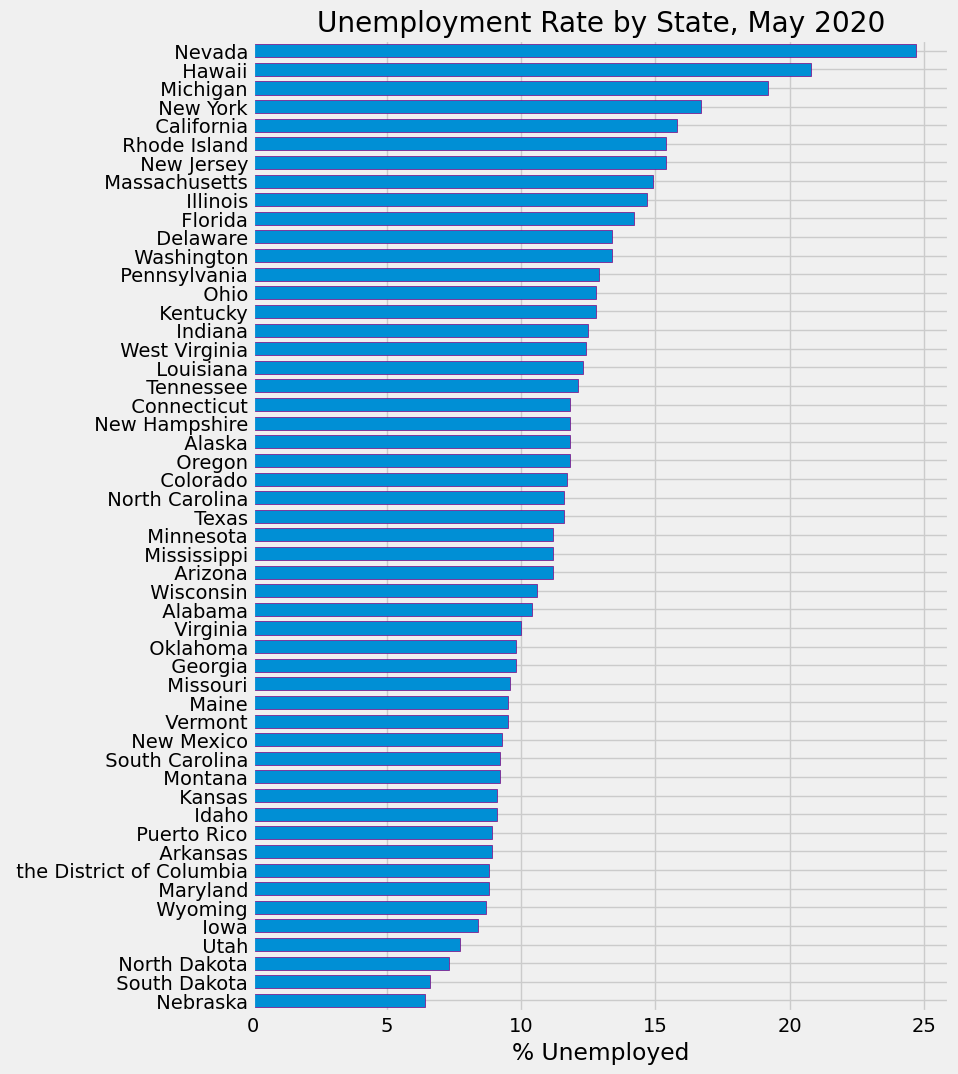

In [158]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), width = 0.7, edgecolor = 'purple', title='Unemployment Rate by State, May 2020')
ax.set_xlabel('% Unemployed')
ax.legend().remove()
plt.show()

___


## Participation Rate, May 2020

Now, similar to what we did with the unemployment rate of each state, let's take a look at the participation rate of each state.
Note that the participation rate is the amount (or percent) of people who are actively looking for jobs in the market.

In [266]:
part_df = fred.search('labor force participation rate for', filter=('frequency', 'Monthly'))
# Filter to include only rows where 'title' starts with the exact phrase
part_df = part_df[part_df['title'].str.startswith("Labor Force Participation Rate for")]
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df.head()


id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-10-27   2024-10-27   
LBSSA01    LBSSA01     2024-10-27   2024-10-27   
LBSSA36    LBSSA36     2024-10-27   2024-10-27   
LBSSA26    LBSSA26     2024-10-27   2024-10-27   
LBSSA28    LBSSA28     2024-10-27   2024-10-27   

                                                    title observation_start  \
series id                                                                     
LBSSA06     Labor Force Participation Rate for California        1976-01-01   
LBSSA01        Labor Force Participation Rate for Alabama        1976-01-01   
LBSSA36       Labor Force Participation Rate for New York        1976-01-01   
LBSSA26       Labor Force Participation Rate for Michigan        1976-01-01   
LBSSA28    Labor Force Participation Rate for Mississippi        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
LBSSA06        2024-09-01   Monthly               M  Percent           %   
LBSSA01        2024-09-01   Monthly               M  Percent           %   
LBSSA36        2024-09-01   Monthly               M  Percent           %   
LBSSA26        2024-09-01   Monthly               M  Percent           %   
LBSSA28        2024-09-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
LBSSA06    Seasonally Adjusted                        SA   
LBSSA01    Seasonally Adjusted                        SA   
LBSSA36    Seasonally Adjusted                        SA   
LBSSA26    Seasonally Adjusted                        SA   
LBSSA28    Seasonally Adjusted                        SA   

                       last_updated popularity  \
series id                                        
LBSSA06   2024-10-22 09:01:04-05:00         21   
LBSSA01   2024-10-22 09:01:06-05:00         13   
LBSSA36   2024-10-22 09:01:03-05:00         23   
LBSSA26   2024-10-22 09:01:02-05:00         22   
LBSSA28   2024-10-22 09:01:02-05:00         21   

                                                       notes  
series id                                                     
LBSSA06    A state's labor-force participation rate is th...  
LBSSA01    A state's labor-force participation rate is th...  
LBSSA36    A state's labor-force participation rate is th...  
LBSSA26    A state's labor-force participation rate is th...  
LBSSA28    A state's labor-force participation rate is th...

In [267]:
part_df.shape

(51, 15)

Now, we grab the data from each state once again

In [268]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid) #Converting the data to a dataframe from a series
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)

And, let's rename the columns just as we did with the unemployment rate for easy readability

In [269]:
part_id_for_state = part_df['title'].str.replace('Labor Force Participation Rate for ', "").to_dict()
part_states.columns = [part_id_for_state[c] for c in part_states.columns]

Finally, lets take a look at our data now that it has been renamed and organized

In [270]:
part_states.head()

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1976-01-01     55.8      60.5  61.7       65.6          58.4           64.8   
1976-02-01     55.7      60.3  61.7       65.5          58.3           64.7   
1976-03-01     55.5      60.2  61.7       65.4          58.3           64.6   
1976-04-01     55.5      60.1  61.6       65.4          58.3           64.6   
1976-05-01     55.4      60.1  61.6       65.5          58.3           64.6   

            West Virginia  Minnesota  Tennessee  Maryland  Maine  \
1976-01-01           52.5       65.6       59.6      64.3   62.1   
1976-02-01           52.4       65.5       59.4      64.2   61.9   
1976-03-01           52.3       65.4       59.3      64.1   61.9   
1976-04-01           52.3       65.4       59.3      64.1   61.8   
1976-05-01           52.2       65.5       59.4      64.1   61.7   

            North Carolina  Illinois  Louisiana  Georgia  South Carolina  \
1976-01-01            66.5      63.0       56.8     63.7            65.3   
1976-02-01            66.3      63.0       56.6     63.6            65.2   
1976-03-01            66.2      62.9       56.5     63.5            65.0   
1976-04-01            66.2      62.9       56.4     63.5            64.9   
1976-05-01            66.3      63.0       56.4     63.6            64.7   

            Colorado  Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  \
1976-01-01      67.2  62.8      65.9     64.0      60.5        61.5  64.4   
1976-02-01      67.0  62.6      65.8     63.9      60.3        61.4  64.3   
1976-03-01      66.8  62.5      65.6     63.8      60.3        61.4  64.2   
1976-04-01      66.6  62.5      65.5     63.8      60.4        61.5  64.1   
1976-05-01      66.5  62.6      65.4     63.9      60.6        61.6  64.1   

            Alaska  Washington  Arizona  New Mexico  Idaho  Arkansas  \
1976-01-01    69.0        60.9     59.5        60.8   63.0      57.9   
1976-02-01    68.4        60.7     59.2        60.5   62.8      57.8   
1976-03-01    67.8        60.6     59.1        60.3   62.7      57.7   
1976-04-01    67.9        60.6     59.1        60.3   62.7      57.7   
1976-05-01    67.9        60.7     59.1        60.3   62.8      57.7   

            Oklahoma  Nebraska  Hawaii  Nevada  Montana  Oregon  \
1976-01-01      59.3      64.9    69.9    71.3     62.7    62.9   
1976-02-01      59.2      64.9    69.6    70.8     62.5    62.7   
1976-03-01      59.1      64.8    69.6    70.5     62.4    62.5   
1976-04-01      59.0      64.8    69.4    70.4     62.3    62.4   
1976-05-01      59.0      64.8    69.3    70.5     62.2    62.5   

            New Hampshire  Vermont  Connecticut  North Dakota  South Dakota  \
1976-01-01           65.9     63.6         64.2          62.6          64.6   
1976-02-01           65.6     63.4         64.1          62.4          64.4   
1976-03-01           65.6     63.2         64.0          62.3          64.4   
1976-04-01           65.7     63.5         64.1          62.5          64.3   
1976-05-01           66.0     63.6         64.3          62.6          64.3   

            Kansas  District Of Columbia  Rhode Island  Delaware  Wyoming  
1976-01-01    65.1                  64.4          63.8      62.7     65.3  
1976-02-01    65.0                  64.5          63.7      62.5     64.9  
1976-03-01    64.9                  64.5          63.6      62.5     64.7  
1976-04-01    65.0                  64.5          63.7      62.4     64.9  
1976-05-01    65.1                  64.4          63.6      62.4  

Now let's plot some of this data

___

## Unemployment vs Participation Rates

Now, let's plot some observations

Text(0.5, 1.0, 'California')

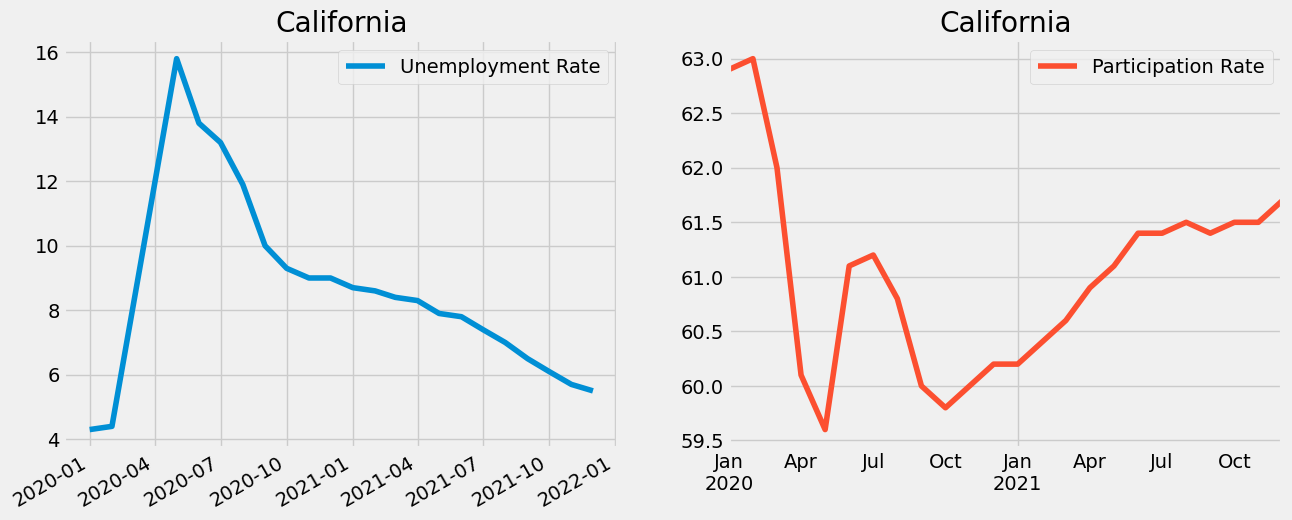

In [284]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

unemp_states.query('index >= 2020 and index < 2022')['California'] \
    .plot(ax=ax1, label = "Unemployment Rate", color =color_pal[0])

part_states.query('index >= 2020 and index < 2022')['California'] \
    .plot(ax= ax2, label = "Participation Rate", color=color_pal[1])


# Set legends for each axis
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.set_title('California')
ax2.set_title('California')

The side by side plots can tell us about the data, but let's look at these plots in an overlayed format

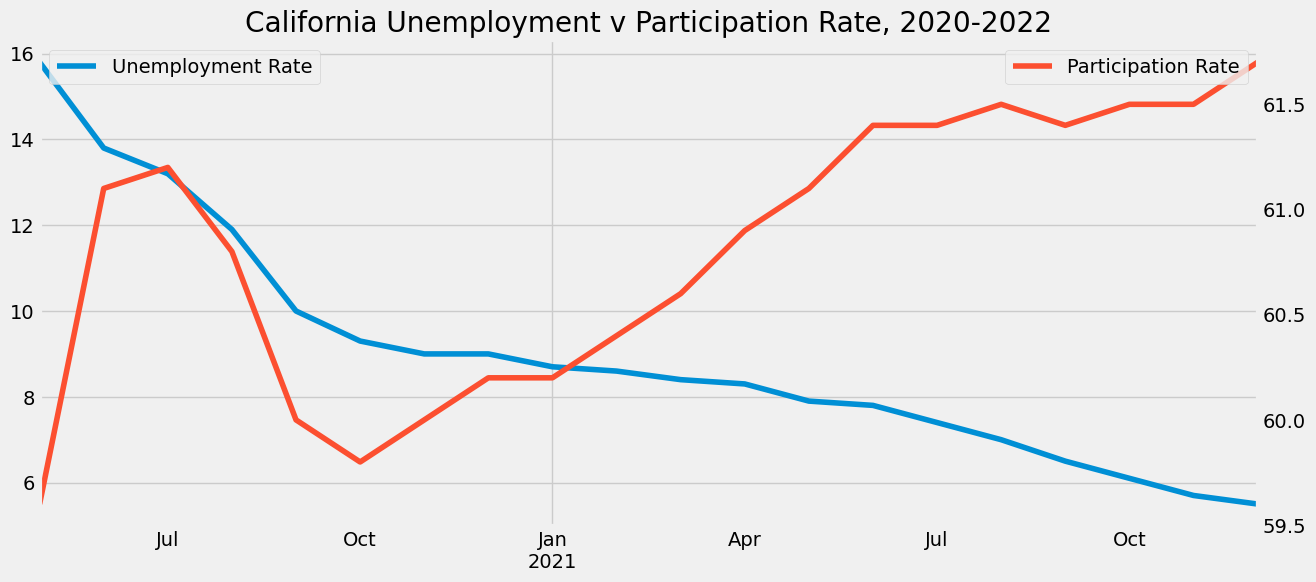

In [285]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()
unemp_states.query('index >= "2020-05-01" and index < "2022-01-01"')['California'] \
    .plot(ax=ax1, label = "Unemployment Rate", color =color_pal[0])

part_states.query('index >= "2020-05-01" and index < "2022-01-01"')['California'] \
    .plot(ax= ax2, label = "Participation Rate", color=color_pal[1])
ax1.set_title('California Unemployment v Participation Rate, 2020-2022')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.grid(False)

Note that these two datasets do have one difference in terms of the state name, so we will fix that

In [319]:
unemp_states = unemp_states.rename(columns= {'the District of Columbia': 'District Of Columbia'})


In [320]:
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'District Of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

In [290]:
part_states.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'West Virginia', 'Minnesota', 'Tennessee', 'Maryland',
       'Maine', 'North Carolina', 'Illinois', 'Louisiana', 'Georgia',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'District Of Columbia',
       'Rhode Island', 'Delaware', 'Wyoming'],
      dtype='object')

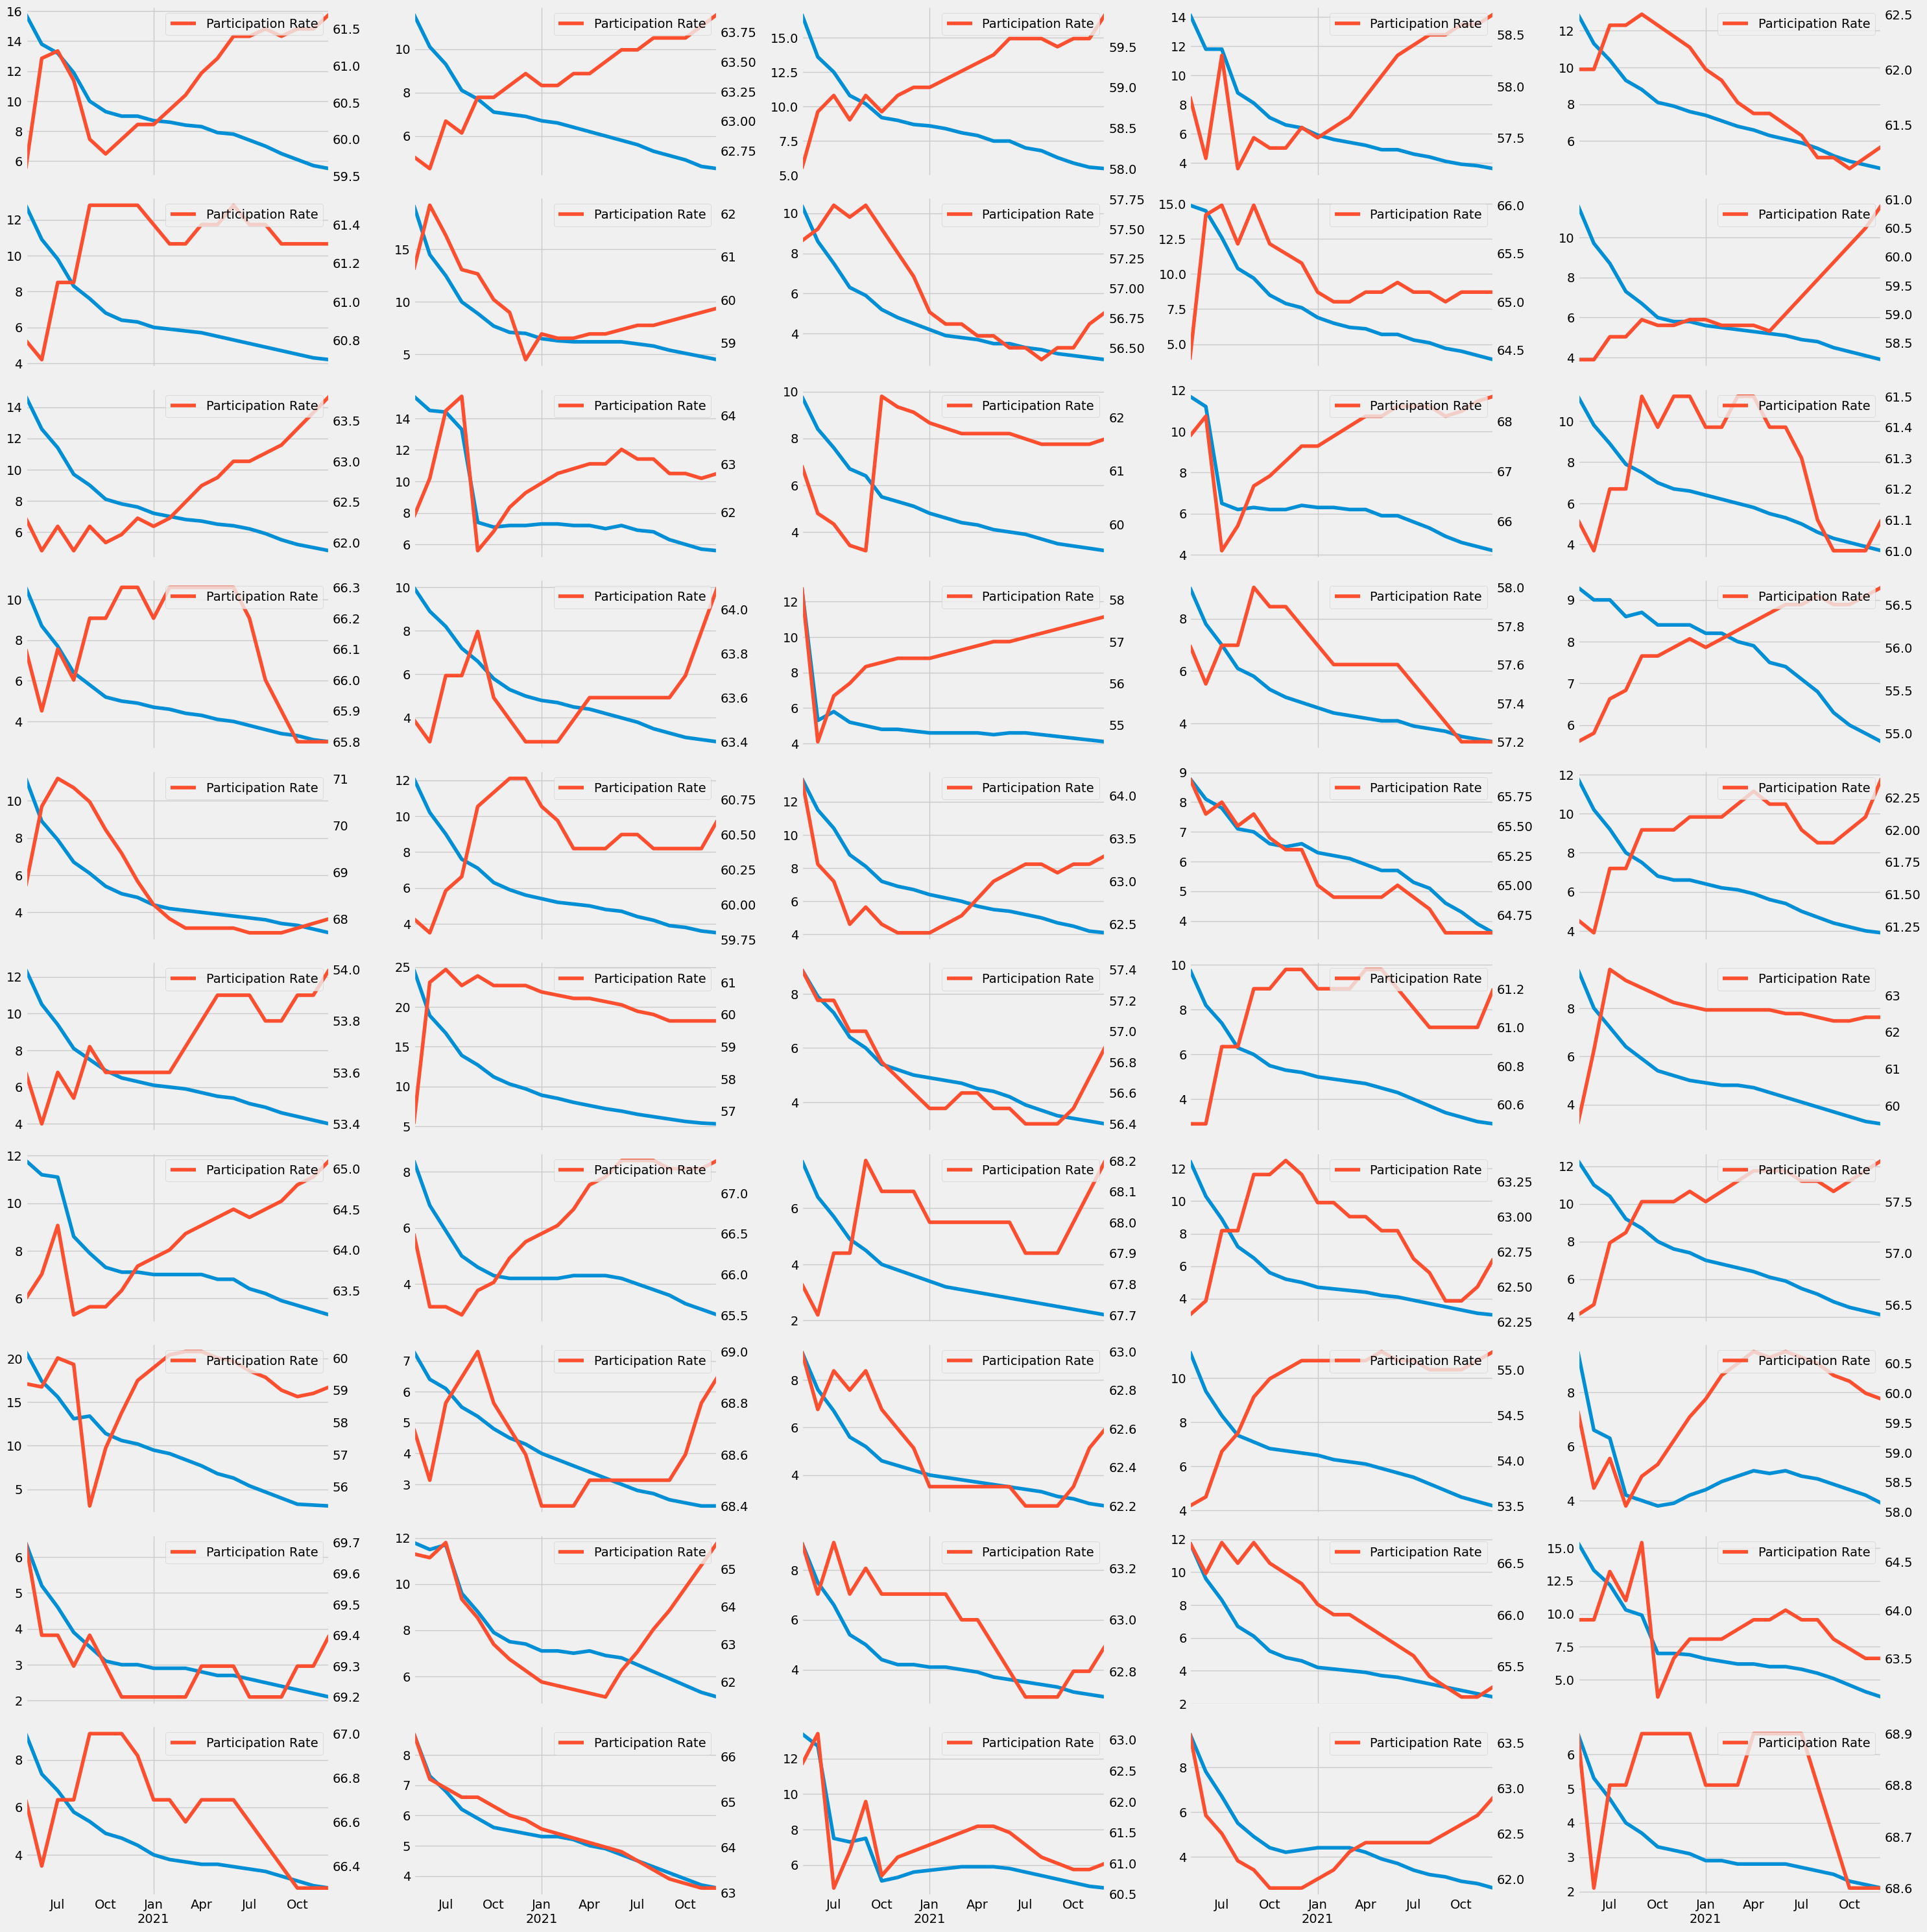

In [326]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state == "Puerto Rico":
        continue
    if state == "District Of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= "2020-05-01" and index < "2022-01-01"')[state] \
        .plot(ax=axs[i], label = "Unemployment Rate", color =color_pal[0])

    part_states.query('index >= "2020-05-01" and index < "2022-01-01"')[state] \
        .plot(ax= ax2, label = "Participation Rate", color=color_pal[1])
    ax.set_title(state, fontsize=8)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax2.grid(False)
    i += 1
plt.tight_layout()
plt.show()

# The End